### MSDS7331 Data Mining Homework #1 - Wid Sogata and James Tsai

### Data Set Description
This data set contains the complete loan data for all Lending Club loans issued through year 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and the latest payment information. Each of the entries in the data set is based on the previous completed calendar quarter.

### Business Use Case
We would like to identify the characteristic(s) of a given borrower that has the most relevance to keeping a loan payment current. The ability to measure this outcome will help reduce the risk to the lender and thus allow the lender to make better informed decisions when deciding whether a loan should be granted.  The following attributes for our analysis are crucial: Purpose of the Loan, Annual Income, Loan Amount, Term, Employment Length, and Interest Rate.

### Data Attributes - Type and description of each attribute in the data file

There are 74 attributes and 887379 records in the data. Many of the attributes have an insignificant amount or single- valued data. We are going to exclude those from the data frame. Also, some of the attributes do not have any relation to the analysis. We are excluding those as well.

|Name   |Type   |Description   |% missing   |
|---|---|---|---|
|loan_amnt   |continuous    |The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value   | 0.0   |
|funded_amnt     | continuous | The total amount committed to that loan at that point in time|0.0   |
| funded_amnt_inv | continuous | The total amount committed by investors for that loan at that point in time| 0.0   |
| term | categorical | The number of payments on the loan. Values are in months and can be either 36 or 60| 0.0   |
| int_rate | continuous | Interest Rate on the loan| 0.0   |
| installment | continuous | The monthly payment owed by the borrower if the loan originates.| 0.0   |
| grade | categorical | LC assigned loan grade| 0.0   |
| sub_grade | categorical | LC assigned loan subgrade| 0.0   |
| emp_length | continuous | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years|0.0|
| home_ownership | categorical | The home ownership status provided by the borrower during registration. The values are: RENT, OWN, MORTGAGE, OTHER| 0.0 |
| annual_inc | continuous | The self reported annual income provided by the borrower during registration| 0.0   |
| loan_status | categorical | Current status of the loan| 0.0   |
| purpose | categorical | A category provided by the borrower for the loan request| 0.0   |
| zip_code | categorical | The first 3 numbers of the zip code provided by the borrower in the loan application.|0.0|
| addr_state | categorical | The state provided by the borrower in the loan application| 0.0   |
| dti | continuous | A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self reported monthly income| 0.0|
| delinq_2yrs | continuous | The number of 30+ days past due incidences of delinquency in the borrower's credit file for the past 2 years| 0.0   |
| open_acc | continuous | The number of open credit lines in the borrower's credit file| 0.0   |
| pub_rec | continuous | Number of derogatory public records| 0.0   |
| revol_bal | continuous | Total credit revolving balance| 0.0   |
| revol_util | continuous | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit | 0.06%|
| total_acc | continuous | The total number of credit lines currently in the borrower's credit file| 0.0   |
| total_pymnt | continuous | Payments received to date for total amount funded| 0.0   |
| total_pymnt_inv | continuous | Payments received to date for portion of total amount funded by investors| 0.0   |
| total_rec_prncp | continuous | Principal received to date| 0.0   |
| total_rec_int | continuous | Interest received to date| 0.0   |
| total_rec_late_fee | continuous | Late fees received to date| 0.0   |

### Libraries - Import all relevant Python libraries needed for analysis and visualizations

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import warnings
import plotly.plotly as py
py.sign_in('wsogata', 'qv1rb49pn3')
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
from os.path import expanduser
from IPython.display import Image

### Data File

Check that we have the loan file and perform basic line count

In [2]:
!ls -l data/loan.csv
!wc -l data/loan.csv

-rwxr-xr-x@ 1 james  staff  441771600 May 27 15:10 data/loan.csv
  887380 data/loan.csv


### Data Frame - Load the data file into a DataFrame object

In [3]:
home = expanduser('~')
data_dir = home + '/Dropbox/Personal/Jupyter/Notebooks/DataScience-SMU/MSDS7331-Data-Mining/Homework/data/'
filename = 'loan.csv'
df = pd.read_csv(data_dir + filename, low_memory=False)

### Data Quality - Review the attributes are parsed correctly, identify missing values, etc.

Display first 10 rows of DataFrame object.

In [4]:
df.head(n=10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1069639,1304742,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1072053,1288686,3000.0,3000.0,3000.0,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1071795,1306957,5600.0,5600.0,5600.0,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1071570,1306721,5375.0,5375.0,5350.0,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Display a summary of the counts and attribute types.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835922 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

Drop the attributes that are not applicable for visual data analysis such as member ids, and attributes that have insignificant amount or single value data.

In [6]:
df.drop(['id',
         'member_id',
         'verification_status',
         'issue_d',
         'pymnt_plan',
         'url',
         'desc',
         'title',
         'earliest_cr_line',
         'emp_title',
         'inq_last_6mths',
         'initial_list_status',
         'out_prncp',
         'out_prncp_inv',
         'last_pymnt_d',
         'last_pymnt_amnt', 
         'next_pymnt_d',
         'last_credit_pull_d',
         'collections_12_mths_ex_med',
         'mths_since_last_delinq',
         'mths_since_last_record',
         'mths_since_last_major_derog',
         'policy_code',
         'application_type',
         'annual_inc_joint',
         'annual_inc_joint',
         'dti_joint',
         'verification_status_joint',
         'acc_now_delinq',
         'tot_coll_amt',
         'tot_cur_bal',
         'open_acc_6m',     
         'open_il_6m',
         'open_il_12m',
         'open_il_24m',
         'mths_since_rcnt_il',
         'total_bal_il',
         'il_util',
         'open_rv_12m',
         'open_rv_24m',
         'max_bal_bc',
         'all_util',
         'total_rev_hi_lim',
         'inq_fi',
         'total_cu_tl',
         'inq_last_12m'], axis =1, inplace=True)

Display first 10 rows of DataFrame object after dropping unused attributes.

In [7]:
df.head(n=10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,13648.0,83.7,9.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,1687.0,9.4,4.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,2956.0,98.5,10.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,5598.0,21.0,37.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,...,27783.0,53.9,38.0,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00
5,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,7963.0,28.3,12.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00
6,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,8 years,RENT,...,17726.0,85.6,11.0,8136.840000,8136.84,5110.85,3025.99,0.00,0.00,0.00
7,3000.0,3000.0,3000.0,36 months,18.64,109.43,E,E1,9 years,RENT,...,8221.0,87.5,4.0,3938.144334,3938.14,3000.00,938.14,0.00,0.00,0.00
8,5600.0,5600.0,5600.0,60 months,21.28,152.39,F,F2,4 years,OWN,...,5210.0,32.6,13.0,646.020000,646.02,162.02,294.94,0.00,189.06,2.09
9,5375.0,5375.0,5350.0,60 months,12.69,121.45,B,B5,< 1 year,RENT,...,9279.0,36.5,3.0,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.52


### Simple Statistics

The table below shows some basic statistics for the numeric values in the data set.

We can see that the average loan amount is **\$14,755.26** and the average funded amount is slightly lower at **\$14,741.88**. Both loan amount and funded amount have the same range from a minimum of **\$500.00** to a maximum of **\$35,000.00**.

The average interest rate is **13.25%**, which is close to the 50 percentile of **12.99%**. Based on interest rate data, the distribution of the interest rate looks close to a normal distribution.

The average annual income is **\$75,0275.00**, however, we notice that maximum annual income was **\$9,500,000.00**, which skews the average. We note that the median annual income is **\$65,000.00**.

It is interesting that the maximum debt-to-income (DTI) ratio is **9999%**, while Lending Club states on their website that a maximum DTI of **30%** is required. We suspect there is a outlier or mistake in the data. However, the average DTI ratio of **18.16%** is well within the **30%** as stated on the link: http://blog.lendingclub.com/responsible-lending-better-returns/. 




In [8]:
df.describe().transpose()

/Users/james/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning:

Invalid value encountered in percentile



,count,mean,std,min,25%,50%,75%,max
loan_amnt,887379.0,14755.264605,8435.455601,500.00,8000.000,13000.000000,20000.000000,3.500000e+04
funded_amnt,887379.0,14741.877625,8429.897657,500.00,8000.000,13000.000000,20000.000000,3.500000e+04
funded_amnt_inv,887379.0,14702.464383,8442.106732,0.00,8000.000,13000.000000,20000.000000,3.500000e+04
int_rate,887379.0,13.246740,4.381867,5.32,9.990,12.990000,16.200000,2.899000e+01
installment,887379.0,436.717127,244.186593,15.67,260.705,382.550000,572.600000,1.445460e+03
annual_inc,887375.0,75027.587761,64698.300142,0.00,NaN,NaN,NaN,9.500000e+06
dti,887379.0,18.157039,17.190626,0.00,11.910,17.650000,23.950000,9.999000e+03
delinq_2yrs,887350.0,0.314442,0.862244,0.00,NaN,NaN,NaN,3.900000e+01
open_acc,887350.0,11.548469,5.317313,0.00,NaN,NaN,NaN,9.000000e+01
pub_rec,887350.0,0.195307,0.582091,0.00,NaN,NaN,NaN,8.600000e+01


In [9]:
df.median()

loan_amnt                  13000.000000
funded_amnt                13000.000000
funded_amnt_inv            13000.000000
int_rate                      12.990000
installment                  382.550000
annual_inc                 65000.000000
dti                           17.650000
delinq_2yrs                    0.000000
open_acc                      11.000000
pub_rec                        0.000000
revol_bal                  11875.000000
revol_util                    56.000000
total_acc                     24.000000
total_pymnt                 4894.999117
total_pymnt_inv             4862.010000
total_rec_prncp             3215.320000
total_rec_int               1073.280000
total_rec_late_fee             0.000000
recoveries                     0.000000
collection_recovery_fee        0.000000
dtype: float64

<b><u>Resubmission</u></b>

<mark>In general, the longer the borrower has been employed, the lower amount that is borrowed. This is intuitive because the longer the borrower works, we suspect on average the less they have to borrow. The reason why the 10+ years category is the largest value is because the range of the category is much larger. We do not have anymore granularity in the data in terms of exact number of years of employment for borrowers with 10+ years.</mark>

Next, we continue with some analysis of categorical variables.

We observe the employment length for the borrowers using a histogram. The employment length of 0 to 5 years account for **43.37%** of the borrowers. The employment length of 6 to 9 years account for **18.72%** of the borrowers. The employement length of 10 years or greater account for **32.86%** of the borrowers. **5.05%** of the borrowers have a unknown employment status.



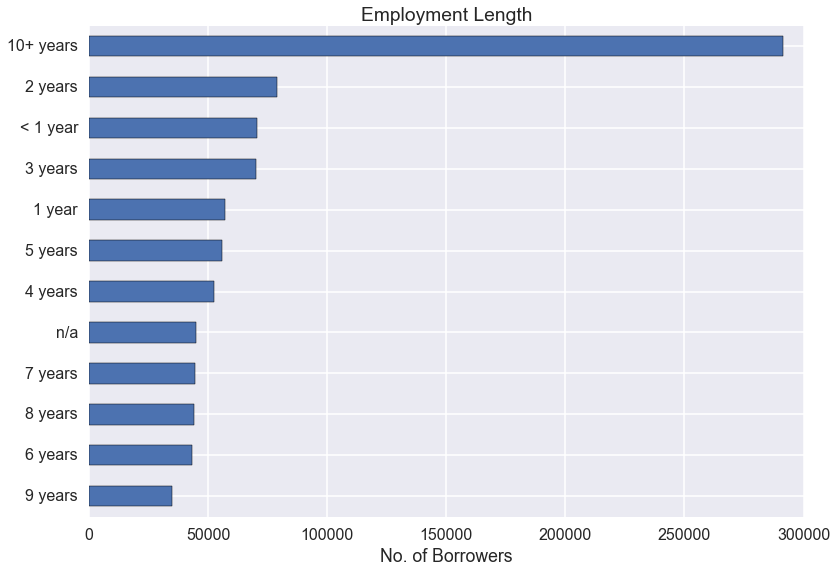

In [10]:
plt.style.use('seaborn-poster')
df['emp_length'].value_counts(ascending=True).plot(kind='barh', title='Employment Length')
plt.xlabel('No. of Borrowers')

In [11]:
df.emp_length.value_counts()

10+ years    291569
2 years       78870
< 1 year      70605
3 years       70026
1 year        57095
5 years       55704
4 years       52529
n/a           44825
7 years       44594
8 years       43955
6 years       42950
9 years       34657
Name: emp_length, dtype: int64

Calculate the percentage of data where employment length falls between 0 and 5 years.

In [12]:
round(float(len(df[(df.emp_length == '< 1 year') |
                   (df.emp_length == '1 year') |
                   (df.emp_length == '2 years') |
                   (df.emp_length == '3 years') |
                   (df.emp_length == '4 years') |
                   (df.emp_length == '5 years')]))/float(len(df['emp_length'])) * 100, 2)

43.37

Calculate the percentage of data where employment length falls between 6 and 9 years.

In [13]:
round(float(len(df[(df.emp_length == '6 years') |
                   (df.emp_length == '7 years') |
                   (df.emp_length == '8 years') |
                   (df.emp_length == '9 years')]))/float(len(df['emp_length'])) * 100, 2)

18.72

Calculate the percentage of data where employment length is 10+ years.

In [14]:
round(float(len(df[(df.emp_length == '10+ years')]))/float(len(df['emp_length'])) * 100, 2)

32.86

Calculate the percentage of data where employment length is not available.

In [15]:
round(float(len(df[(df.emp_length == 'n/a')]))/float(len(df['emp_length'])) * 100, 2)

5.05

### Data Imputation

In [16]:
# Replace NaN with mean values
df.revol_util.fillna(df.revol_util.mean, inplace=True)

Make sure data imputation was complete on missing values in revol_util attribute.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 29 columns):
loan_amnt                  887379 non-null float64
funded_amnt                887379 non-null float64
funded_amnt_inv            887379 non-null float64
term                       887379 non-null object
int_rate                   887379 non-null float64
installment                887379 non-null float64
grade                      887379 non-null object
sub_grade                  887379 non-null object
emp_length                 887379 non-null object
home_ownership             887379 non-null object
annual_inc                 887375 non-null float64
loan_status                887379 non-null object
purpose                    887379 non-null object
zip_code                   887379 non-null object
addr_state                 887379 non-null object
dti                        887379 non-null float64
delinq_2yrs                887350 non-null float64
open_acc                   8873

<b><u>Resubmission</u></b>

<mark>This is an interesting distribution. Usually the longer the term for the loan, the higher the ROI (return on investment) for the lender. However, in this case, the majority of terms are 36 months. We suspect that the majority of the loans are not too large, and the borrowers have an immediate need for the loan. For example, medical emergencies, emergency home repairs, and credit card consolidation. Also, we note that shorter term loans are usually safer for the lender, as there are fewer unexpected events with the borrower, all things being equal. From this perspective, Lending Club has a conservative portfolio with a 70/30 distribution between the short-term and long-term loans.</mark>

Next we explore the terms and the purpose of the loans in the data set.

Exactly **70.00%** of the terms are 36 months, and **30.00%** of the terms are 60 months.

(-1.0165283189972172,
 1.0587669703902551,
 -1.0932880813105288,
 1.0113733978780906)

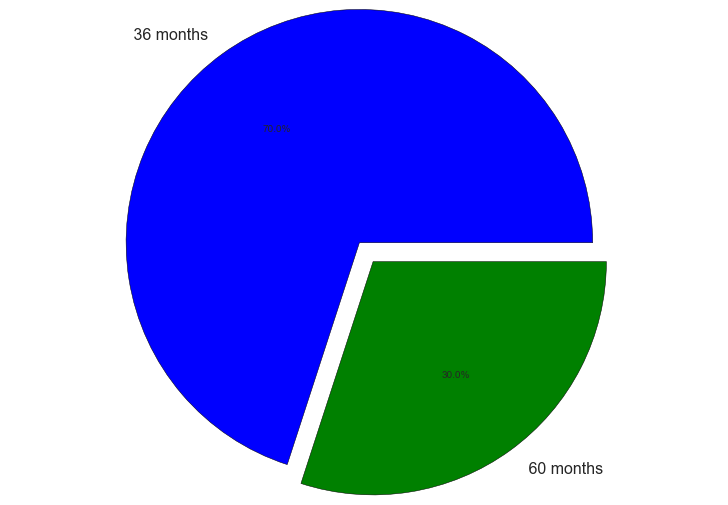

In [18]:
plt.style.use('seaborn-poster')
dfTerm = sorted(df['term'].unique())
dfTermCount = df.groupby(['term'], sort = True).agg({'term':'count'})
dfTermCount = dfTermCount['term'].tolist()

plt.pie(dfTermCount, 
        explode = (0, 0.1),
        labels = dfTerm, 
        autopct = '%1.1f%%')
plt.axis('equal')

We note that **82.31%** of borrowers have debt consolidation or credit card for the purpose of the loan. The remaining **17.69%** account for non-debt related purposes.

Calculate the percentage of data where purpose is debt consolidation or credit card.

In [19]:
round(float(len(df[(df.purpose == 'debt_consolidation') |
                   (df.purpose == 'credit_card')]))/float(len(df['purpose'])) * 100, 2)

82.31

Calculate the percentage of data where purpose is not debt consolidation and credit card.

In [20]:
round(float(len(df[(df.purpose != 'debt_consolidation') &
                   (df.purpose != 'credit_card')]))/float(len(df['purpose'])) * 100, 2)

17.69

<b><u>Resubmission</u></b>

<mark>We are able to visually confirm that the purpose of the loans fall into categories that would be used by the borrower for short-term needs with debt consolidation, credit card, and home improvement being the top 3 categories. We also confirm that the top 3 categories for 60 months term are the same. They maintain roughly the 70/30 percentage distribution among the 3 categories.</mark>

The following cross tabular chart shows terms of the loan distributed within each purpose of loan.

It confirms visually the above pie chart that the ratio of 60 months term to 36 months term is 3-to-7 for all the loans combined.

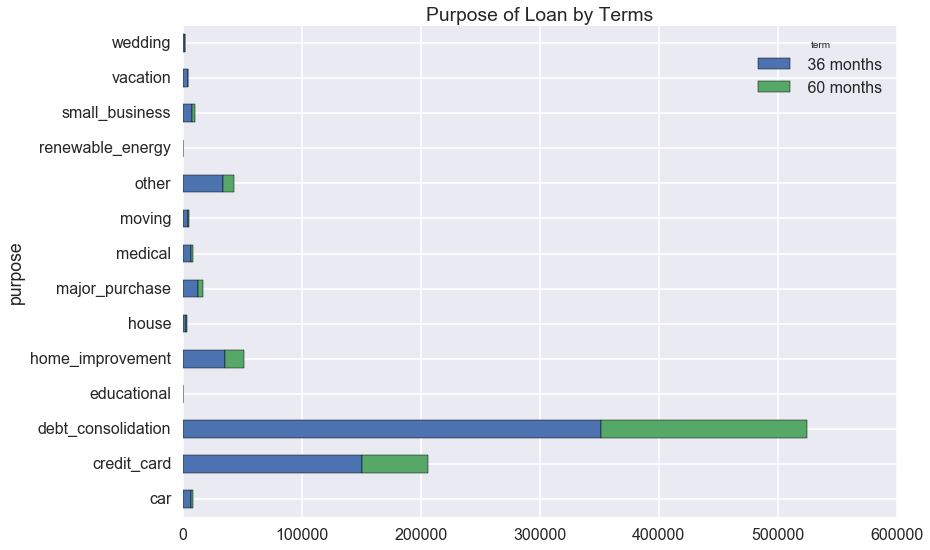

In [21]:
plt.style.use('seaborn-poster')
ct = pd.crosstab([df['purpose']], df.term.astype(str))
ct.plot.barh(stacked=True, title='Purpose of Loan by Terms')

In [22]:
df[df.term.str.contains('36')].loan_amnt.describe()

count    621125.000000
mean      12481.396458
std        7780.864225
min         500.000000
25%        6625.000000
50%       10000.000000
75%       16000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

In [23]:
df[df.term.str.contains('60')].loan_amnt.describe()

count    266254.000000
mean      20059.809712
std        7464.594472
min        1000.000000
25%       14400.000000
50%       19425.000000
75%       25000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

In [24]:
df2 = df.groupby(['purpose','term'], sort = True).agg({'term':'count'})
df2.head(n=20)

term
purpose            term              
car                 36 months    6954
                    60 months    1909
credit_card         36 months  150410
                    60 months   55772
debt_consolidation  36 months  351848
                    60 months  172367
educational         36 months     406
                    60 months      17
home_improvement    36 months   35832
                    60 months   15997
house               36 months    2615
                    60 months    1092
major_purchase      36 months   13034
                    60 months    4243
medical             36 months    6960
                    60 months    1580
moving              36 months    4662
                    60 months     752
other               36 months   34099
                    60 months    8795

In [25]:
df['purpose'].value_counts()

debt_consolidation    524215
credit_card           206182
home_improvement       51829
other                  42894
major_purchase         17277
small_business         10377
car                     8863
medical                 8540
moving                  5414
vacation                4736
house                   3707
wedding                 2347
renewable_energy         575
educational              423
Name: purpose, dtype: int64

Next we review the purpose by loan amount.

We know from looking at the boxplots, the categories of car, other, wedding, major purchase, medical, moving, vacation, renewable energy, and education contain outliers (1.5 x IQR). The range of loan amounts for credit card, small business, debt consolidation, home improvement, and house contain no outliers. Further investigation will need to be conducted to better understand the reasons behind the outliers.

In general, the categories with the largest loan amounts are credit card, small business, debt consolidation, home improvement, and house. The smallest loan amounts fall in the vacation and educational categories.

The average loan amount across all categories is: **\$14,755.26** with a standard deviation of **\$8,435.46**. The minimal loan amount is: **\$500.00** and the maximum loan amount is: **\$35,000.00**.

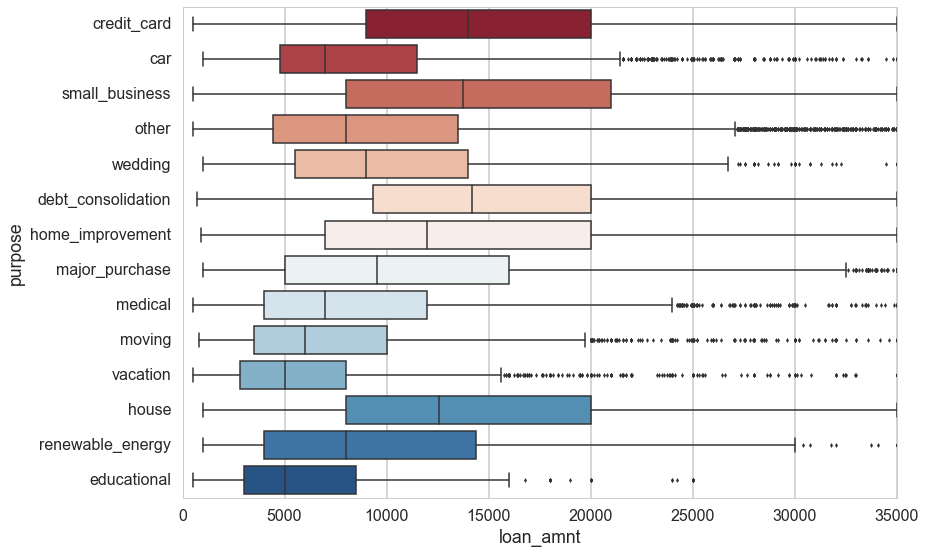

In [26]:
#df.reindex(index=df.purpose)
#plt.style.use('ggplot')
#df.boxplot(column='loan_amnt', by = 'purpose', widths=0.25, rot=90)
#seaborn looks nicer
df.reindex(index=df.purpose)
sb.set_style("whitegrid")
sb.boxplot(data=df,
           y='purpose',
           x='loan_amnt',
           orient='h',
           palette=sb.color_palette("RdBu", n_colors=14),
           linewidth=1.5,
           fliersize=3.5)

In [27]:
df['loan_amnt'].describe()

count    887379.000000
mean      14755.264605
std        8435.455601
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

<b><u>Resubmission</u></b>  
<mark>With 91.45% of the loans in good standing (Current or Fully Paid), the loan portfolio is in good shape, and the business model looks viable. Since this data set comprises of loans issued in a span of 8 years, we can speculate that the business has robust growth since there are only two possible terms of 3 years and 5 years. If the business was not growing, we should see a larger percentage of fully paid loans.</mark>

Next we explore the loan status.

We note that **91.45%** of the loan status are in good standing (Current or Fully Paid), whereas only **8.55%** of the loans are not in good standing.

In [28]:
# Display Percentage of Loan Status
dfStatus = sorted(df['loan_status'].unique())
dfStatusCount = df.groupby(['loan_status'], sort = True).agg({'term':'count'})
dfStatusCount = dfStatusCount['term'].tolist()

pie = {
    'data' : [{ 'labels': dfStatus,
                'values' : dfStatusCount,
                'type' : 'pie'}],
     'layout': {'title': 'Loan Status'}
}
url = py.plot(pie, filename = 'Loan Status')

#### The loan status image cannot be displayed without the image file.
![Alt](./loan_status.png)

In [29]:
df.reindex(index=df.purpose)
df.loan_status.value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

Calculate the percentage of data where loan status is current or fully paid.

In [30]:
round(float(len(df[(df.loan_status == 'Current') |
                   (df.loan_status == 'Fully Paid') |
                   (df.loan_status == 'Does not meet the credit policy. Status:Fully Paid')]))/float(len(df.loan_status)) * 100, 2)

91.45

Calculate the percentage of data where loan status is not current or fully paid.

In [31]:
round(float(len(df[(df.loan_status != 'Current') &
                   (df.loan_status != 'Fully Paid') &
                   (df.loan_status != 'Does not meet the credit policy. Status:Fully Paid')]))/float(len(df.loan_status)) * 100, 2)

8.55

<b><u>Resubmission</u></b>  
<mark>This histogram is similar to the previous histogram, but instead of showing the term by purpose, we show the loan status by purpose. We can confirm visually that the distribution of loan status are roughly the same in each purpose. For example, we do see any one category as having loan status dominated by a single type.</mark>

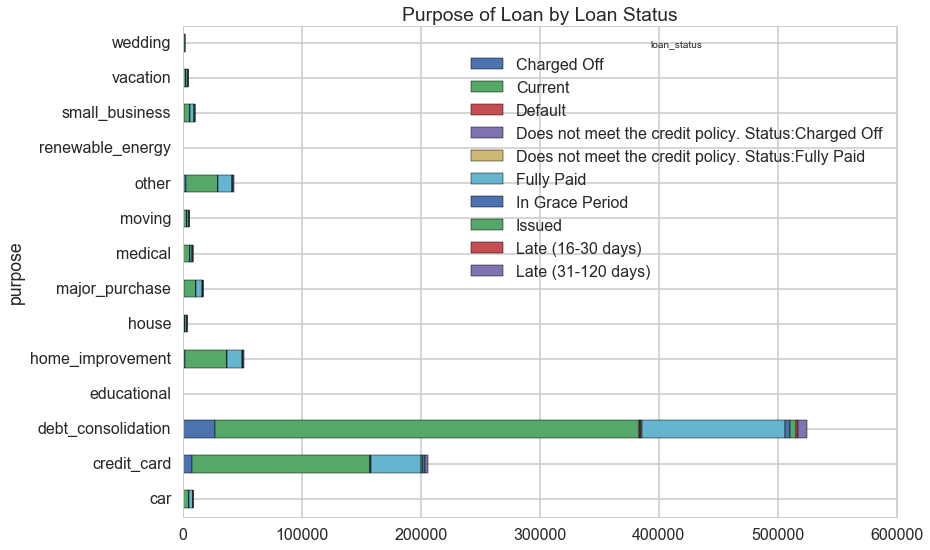

In [32]:
plt.style.use('seaborn-poster')
ct = pd.crosstab([df['purpose']], df.loan_status.astype(str))
ct.plot.barh(stacked=True, title='Purpose of Loan by Loan Status')

### Conversion of string values to numerical values for the purpose of analysis

In [33]:
df = df.replace(to_replace="10+ years",value=10)
df = df.replace(to_replace="< 1 year",value=0)
df = df.replace(to_replace="1 year",value=1)
df = df.replace(to_replace="2 years",value=2)
df = df.replace(to_replace="3 years",value=3)
df = df.replace(to_replace="4 years",value=4)
df = df.replace(to_replace="5 years",value=5)
df = df.replace(to_replace="6 years",value=6)
df = df.replace(to_replace="7 years",value=7)
df = df.replace(to_replace="8 years",value=8)
df = df.replace(to_replace="9 years",value=9)
df = df.replace(to_replace="n/a",value=5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 29 columns):
loan_amnt                  887379 non-null float64
funded_amnt                887379 non-null float64
funded_amnt_inv            887379 non-null float64
term                       887379 non-null object
int_rate                   887379 non-null float64
installment                887379 non-null float64
grade                      887379 non-null object
sub_grade                  887379 non-null object
emp_length                 887379 non-null int64
home_ownership             887379 non-null object
annual_inc                 887375 non-null float64
loan_status                887379 non-null object
purpose                    887379 non-null object
zip_code                   887379 non-null object
addr_state                 887379 non-null object
dti                        887379 non-null float64
delinq_2yrs                887350 non-null float64
open_acc                   88735

<b><u>Resubmission</u></b>  
<mark> </mark>

In [156]:
df1 = df[(df.loan_status=='Charged Off') |
   (df.loan_status=='Issued') |
   (df.loan_status=='Late (31-120 days)') |
   (df.loan_status=='In Grace Period') |
   (df.loan_status=='Late (16-30 days)') |
   (df.loan_status=='Default') |
   (df.loan_status=='Does not meet the credit policy. Status:Charged Off')]


# Hot encode loan grade (A, B, C, D, E, F, G)
tmp_df = pd.get_dummies(df1.grade,prefix='grade')
df1 = pd.concat((df1,tmp_df),axis=1)

c1 = df1[df1.loan_status=='Charged Off'].loan_amnt.mean()
c2 = df1[df1.loan_status=='Issued'].loan_amnt.mean()
c3 = df1[df1.loan_status=='Late (31-120 days)'].loan_amnt.mean()
c4 = df1[df1.loan_status=='In Grace Period'].loan_amnt.mean()
c5 = df1[df1.loan_status=='Late (16-30 days)'].loan_amnt.mean()
c6 = df1[df1.loan_status=='Default'].loan_amnt.mean()
c7 = df1[df1.loan_status=='Does not meet the credit policy. Status:Charged Off'].loan_amnt.mean()

r1 = df1[df1.loan_status=='Charged Off'].recoveries.mean()
r2 = df1[df1.loan_status=='Issued'].recoveries.mean()
r3 = df1[df1.loan_status=='Late (31-120 days)'].recoveries.mean()
r4 = df1[df1.loan_status=='In Grace Period'].recoveries.mean()
r5 = df1[df1.loan_status=='Late (16-30 days)'].recoveries.mean()
r6 = df1[df1.loan_status=='Default'].recoveries.mean()
r7 = df1[df1.loan_status=='Does not meet the credit policy. Status:Charged Off'].recoveries.mean()

g1 = df1[df1.loan_status=='Charged Off'].grade_A.sum()
g2 = df1[df1.loan_status=='Charged Off'].grade_B.sum()
g3 = df1[df1.loan_status=='Charged Off'].grade_C.sum()
g4 = df1[df1.loan_status=='Charged Off'].grade_D.sum()
g5 = df1[df1.loan_status=='Charged Off'].grade_E.sum()
g6 = df1[df1.loan_status=='Charged Off'].grade_F.sum()
g7 = df1[df1.loan_status=='Charged Off'].grade_G.sum()

h1 = df1[df1.loan_status=='Issued'].grade_A.sum()
h2 = df1[df1.loan_status=='Issued'].grade_B.sum()
h3 = df1[df1.loan_status=='Issued'].grade_C.sum()
h4 = df1[df1.loan_status=='Issued'].grade_D.sum()
h5 = df1[df1.loan_status=='Issued'].grade_E.sum()
h6 = df1[df1.loan_status=='Issued'].grade_F.sum()
h7 = df1[df1.loan_status=='Issued'].grade_G.sum()

i1 = df1[df1.loan_status=='Late (31-120 days)'].grade_A.sum()
i2 = df1[df1.loan_status=='Late (31-120 days)'].grade_B.sum()
i3 = df1[df1.loan_status=='Late (31-120 days)'].grade_C.sum()
i4 = df1[df1.loan_status=='Late (31-120 days)'].grade_D.sum()
i5 = df1[df1.loan_status=='Late (31-120 days)'].grade_E.sum()
i6 = df1[df1.loan_status=='Late (31-120 days)'].grade_F.sum()
i7 = df1[df1.loan_status=='Late (31-120 days)'].grade_G.sum()

j1 = df1[df1.loan_status=='In Grace Period'].grade_A.sum()
j2 = df1[df1.loan_status=='In Grace Period'].grade_B.sum()
j3 = df1[df1.loan_status=='In Grace Period'].grade_C.sum()
j4 = df1[df1.loan_status=='In Grace Period'].grade_D.sum()
j5 = df1[df1.loan_status=='In Grace Period'].grade_E.sum()
j6 = df1[df1.loan_status=='In Grace Period'].grade_F.sum()
j7 = df1[df1.loan_status=='In Grace Period'].grade_G.sum()

k1 = df1[df1.loan_status=='Late (16-30 days)'].grade_A.sum()
k2 = df1[df1.loan_status=='Late (16-30 days)'].grade_B.sum()
k3 = df1[df1.loan_status=='Late (16-30 days)'].grade_C.sum()
k4 = df1[df1.loan_status=='Late (16-30 days)'].grade_D.sum()
k5 = df1[df1.loan_status=='Late (16-30 days)'].grade_E.sum()
k6 = df1[df1.loan_status=='Late (16-30 days)'].grade_F.sum()
k7 = df1[df1.loan_status=='Late (16-30 days)'].grade_G.sum()

l1 = df1[df1.loan_status=='Default'].grade_A.sum()
l2 = df1[df1.loan_status=='Default'].grade_B.sum()
l3 = df1[df1.loan_status=='Default'].grade_C.sum()
l4 = df1[df1.loan_status=='Default'].grade_D.sum()
l5 = df1[df1.loan_status=='Default'].grade_E.sum()
l6 = df1[df1.loan_status=='Default'].grade_F.sum()
l7 = df1[df1.loan_status=='Default'].grade_G.sum()

m1 = df1[df1.loan_status=='Does not meet the credit policy. Status:Charged Off'].grade_A.sum()
m2 = df1[df1.loan_status=='Does not meet the credit policy. Status:Charged Off'].grade_B.sum()
m3 = df1[df1.loan_status=='Does not meet the credit policy. Status:Charged Off'].grade_C.sum()
m4 = df1[df1.loan_status=='Does not meet the credit policy. Status:Charged Off'].grade_D.sum()
m5 = df1[df1.loan_status=='Does not meet the credit policy. Status:Charged Off'].grade_E.sum()
m6 = df1[df1.loan_status=='Does not meet the credit policy. Status:Charged Off'].grade_F.sum()
m7 = df1[df1.loan_status=='Does not meet the credit policy. Status:Charged Off'].grade_G.sum()


columns = ['loan_status',
           'loan_amnt (average)',
           'recoveries (average)',
           'grade_A',
           'grade_B',
           'grade_C',
           'grade_D',
           'grade_E',
           'grade_F',
           'grade_G']

data = {'loan_status': ['Charged Off', 'Issued', 'Late', 'In Grace Period', 'Late (16-30 days)','Default', 'Does not meet the credit policy. Status:Charged Off' ],
        'loan_amnt (average)': [c1, c2, c3, c4, c5, c6, c7],
        'recoveries (average)': [r1, r2, r3, r4, r5, r6, r7],
        'grade_A': [g1, h1, i1, j1, k1, l1, m1],
        'grade_B': [g2, h2, i2, j2, k2, l2, m2],
        'grade_C': [g3, h3, i3, j3, k3, l3, m3],
        'grade_D': [g4, h4, i4, j4, k4, l4, m4],
        'grade_E': [g5, h5, i5, j5, k5, l5, m5],
        'grade_F': [g6, h6, i6, j6, k6, l6, m6],
        'grade_G': [g7, h7, i7, j7, k7, l7, m7],
       }

df_ = pd.DataFrame(data=data, columns=columns)
df_.sort_values(by='loan_amnt (average)', ascending=False)

,loan_status,loan_amnt (average),recoveries (average),grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
3,In Grace Period,16005.741244,0.000000,365.0,1240.0,1887.0,1405.0,908.0,354.0,94.0
4,Late (16-30 days),15670.661858,0.000000,134.0,410.0,678.0,569.0,368.0,155.0,43.0
2,Late,15569.308084,0.000000,492.0,2004.0,3339.0,2890.0,1852.0,768.0,246.0
1,Issued,15298.587470,0.000000,1448.0,2529.0,2472.0,1185.0,593.0,194.0,39.0
5,Default,15193.847416,0.000000,47.0,198.0,360.0,312.0,201.0,79.0,22.0
0,Charged Off,14556.293096,890.805156,2617.0,9519.0,12642.0,10486.0,6258.0,2934.0,792.0
6,Does not meet the credit policy. Status:Charge...,9527.233903,579.002047,8.0,85.0,148.0,197.0,158.0,93.0,72.0


In [142]:
df2 = df[(df.loan_status=='Fully Paid') |
         (df.loan_status=='Current') |
         (df.loan_status=='Does not meet the credit policy. Status:Fully Paid')]

c1 = df2[df2.loan_status=='Fully Paid'].loan_amnt.mean()
c2 = df2[df2.loan_status=='Current'].loan_amnt.mean()
c3 = df2[df2.loan_status=='Does not meet the credit policy. Status:Fully Paid'].loan_amnt.mean()

r1 = df2[df2.loan_status=='Fully Paid'].recoveries.mean()
r2 = df2[df2.loan_status=='Current'].recoveries.mean()
r3 = df2[df2.loan_status=='Does not meet the credit policy. Status:Fully Paid'].recoveries.mean()

columns = ['loan_status','loan_amnt (average)','recoveries (average)']
data = {'loan_status': ['Fully Paid', 'Current', 'Does not meet the credit policy. Status:Fully Paid' ],
        'loan_amnt (average)': [c1, c2, c3],
        'recoveries (average)': [r1, r2, r3]}

df2_ = pd.DataFrame(data=data, columns=columns)
df2_.sort_values(by='loan_amnt (average)', ascending=False)

,loan_status,loan_amnt (average),recoveries (average)
1,Current,15241.880242,0.0
0,Fully Paid,13346.350910,0.0
2,Does not meet the credit policy. Status:Fully ...,8853.231891,0.0


In [36]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee
count,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,887350.000000,8.873790e+05,887350.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000
mean,14755.264605,14741.877625,14702.464383,13.246740,436.717127,5.957742,7.502759e+04,18.157039,0.314442,11.548469,0.195307,1.692079e+04,25.268026,7558.826684,7521.160306,5757.706424,1754.804327,0.396692,45.919243,4.880757
std,8435.455601,8429.897657,8442.106732,4.381867,244.186593,3.579183,6.469830e+04,17.190626,0.862244,5.317313,0.582091,2.242679e+04,11.840561,7871.243336,7846.108604,6625.441046,2095.356099,4.087825,409.693874,63.125281
min,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,8000.000000,8000.000000,9.990000,260.705000,3.000000,NaN,11.910000,NaN,NaN,NaN,6.443000e+03,NaN,1914.590000,1899.700000,1200.570000,441.460000,0.000000,0.000000,0.000000
50%,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.000000,NaN,17.650000,NaN,NaN,NaN,1.187500e+04,NaN,4894.999117,4862.010000,3215.320000,1073.280000,0.000000,0.000000,0.000000
75%,20000.000000,20000.000000,20000.000000,16.200000,572.600000,10.000000,NaN,23.950000,NaN,NaN,NaN,2.082900e+04,NaN,10616.814231,10565.690000,8000.000000,2238.265000,0.000000,0.000000,0.000000
max,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,10.000000,9.500000e+06,9999.000000,39.000000,90.000000,86.000000,2.904836e+06,169.000000,57777.579870,57777.580000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000


In [ ]:
df.recoveries.describe()

In [ ]:
df1.recoveries.describe()

In [ ]:
# Replace string values to numeric values for analysis purposes
df = df.replace(to_replace=" 36 months",value=0)
df = df.replace(to_replace=" 60 months",value=1)
df = df.replace(to_replace= ['Fully Paid',
                             'Current',
                             'Does not meet the credit policy. Status:Fully Paid'],value = 0)
df = df.replace(to_replace= ['Charged Off',
                             'Issued',
                             'Late (31-120 days)',
                             'In Grace Period',
                             'Late (16-30 days)',
                             'Default',
                             'Does not meet the credit policy. Status:Charged Off'], value = 1)
df['loan_status'].value_counts()

### Correlation Analysis

The following section shows correlation between attributes.

The correlation heatmap does not indicate a high-correlation bewteeen loan status and any of the attributes we investigated. We suspect there is multi-colinearity between the attributes. Further investigation of the interactions will need to be performed.

We also attempted to drop some of the multi-colinear attributes, however, that did not significantly improve the correlation to the loan status.

We note that the strongest correlation to the loan status is the interest rate at **0.16**.

In [ ]:
df.corr()

Correlation/Heatmap Matrix

In [ ]:
from matplotlib import pyplot as plt
sb.set_style("whitegrid")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr,
           cmap=cmap,
           mask=mask,
           square=True,
           linewidths=0.5,
           cbar_kws={"shrink": 0.80},
           ax=ax,
           vmax=0.5)

plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.drop(['funded_amnt',
         'funded_amnt_inv',
         'installment',
         'total_pymnt_inv',
         'total_rec_prncp',
         'total_rec_int',
         'collection_recovery_fee',
         'open_acc'], axis=1, inplace=True)

In [ ]:
df.corr()

### Conclusion

Since the loan status is overwhelmingly biased toward good standing (**91.45%**), it masks the correlation of the other attributes, making it hard to form a simple prediction model. Further investigation will be required in order to better understand characteristics of this data set. Overall, it is obvious the business model is viable in practice based on the success of rate of the loans given by Lending Club.